<div class="alert alert-block alert-success">
    
 
# Berkeley- PCMLAI: OH 4- Airbnb Case Study
    
 👨‍🏫 **Vikesh K**      
 📅 **03-Apr-2023**
  

</div>

<div class="alert alert-block alert-info">

## Overview
Airbnb is a two sided marketplace which matches guests to hosts. The booking flow at Airbnb is as follows: a guest
finds an available room (listing) that they like, and then they contact the host. Once the guest finds a listing they
are interested in, there are three ways to send the host an inquiry: ‘contact_me’, ‘book_it’, or ‘instant_book’
(detailed at the bottom of this document). Upon receiving the inquiry, the host can then decide whether or not to
accept the request (for ‘contact_me’ and ‘book_it’ methods -- instant_book is auto-accepted). One of our goals at
Airbnb is to increase bookings on our platform.
    
You are the first data scientist to join a cross-functional Product and Operations team working to grow bookings in
Rio de Janeiro. The team asks you for help with the following:

1. What key metrics would you propose to monitor over time the success of the team's efforts in improving
the guest host matching process and why? Clearly define your metric(s) and explain how each is
computed.
2. What areas should we invest in to increase the number of successful bookings in Rio de Janeiro? What
segments are doing well and what could be improved? Propose 2-3 specific recommendations (business
initiatives and product changes) that could address these opportunities. Demonstrate rationale behind
each recommendation AND prioritize your recommendations in order of their estimated impact.
3. There is also interest from executives at Airbnb about the work you are doing, and a desire to understand
the broader framing of the challenge of matching supply and demand, thinking beyond the data provided.
What other research, experiments, or approaches could help the company get more clarity on the
problem?

Your assignment: Summarize your recommendations in response to the questions above in a 5-8 slide
presentation intended for the Head of Product and VP of Operations (who is not technical). Include an organized
appendix sharing the details of your work conducted for the Rio team, that would be useful for the data team to
understand your work.

**[Read more here](https://drive.google.com/file/d/1qJPv9iNgjDiUeLsPvWK1eYXOWdYpYqC4/view?usp=sharing)**


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ssl
import numpy as np
import plotly.express as px

ssl._create_default_https_context = ssl._create_unverified_context

## Loading data 

**Please run the below code to ensure that you are able to load the data**

In [40]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/' 

ts_list = ['ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first',
       'ts_booking_at', 'ds_checkin_first', 'ds_checkout_first']

contacts = pd.read_csv(url + "airbnb_contacts.csv", parse_dates=ts_list)

listings = pd.read_csv(url + "aibnb_listings.csv")

users = pd.read_csv(url + "airbnb_users.csv")



In [45]:
listings

,id_listing_anon,room_type,listing_neighborhood,total_reviews
0,71582793-e5f8-46d7-afdf-7a31d2341c79,Private room,-unknown-,0.0
1,a1a3f728-e21f-4432-96aa-361d28e2b319,Entire home/apt,Copacabana,0.0
2,353a68be-ecf9-4b7b-9533-c882dc2f0760,Entire home/apt,Barra da Tijuca,3.0
3,b9ae1908-0486-40ac-bbcf-bd63ffebfe63,Entire home/apt,Lapa,4.0
4,fa0290ef-7881-4482-8981-8ebb1ce5dbfd,Entire home/apt,-unknown-,0.0
...,...,...,...,...
13033,3e1d677a-c953-4c97-96f0-78011d52c468,Entire home/apt,Copacabana,129.0
13034,78f65154-4217-4985-ab65-a5935a8c195f,Entire home/apt,Copacabana,0.0
13035,31f9f27a-077d-47c6-90f9-324ec9d76d35,Entire home/apt,Lagoa,0.0
13036,8cd6b783-e305-4988-a3bd-da1c2523d364,Entire home/apt,Copacabana,0.0


In [9]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27887 entries, 0 to 27886
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   id_guest_anon                         27887 non-null  object        
 1   id_host_anon                          27887 non-null  object        
 2   id_listing_anon                       27887 non-null  object        
 3   ts_interaction_first                  27887 non-null  datetime64[ns]
 4   ts_reply_at_first                     25855 non-null  datetime64[ns]
 5   ts_accepted_at_first                  16415 non-null  datetime64[ns]
 6   ts_booking_at                         11587 non-null  datetime64[ns]
 7   ds_checkin_first                      27887 non-null  datetime64[ns]
 8   ds_checkout_first                     27887 non-null  datetime64[ns]
 9   m_guests                              27886 non-null  float64       
 10

## Your Analysis below 👨🏻‍💻

In [19]:
contacts.head(2)

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36,NaT,NaT,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker


In [35]:
contacts["contact_channel_first"].value_counts().reset_index()

,index,contact_channel_first
0,contact_me,12828
1,book_it,8366
2,instant_book,6693


<AxesSubplot: xlabel='index'>

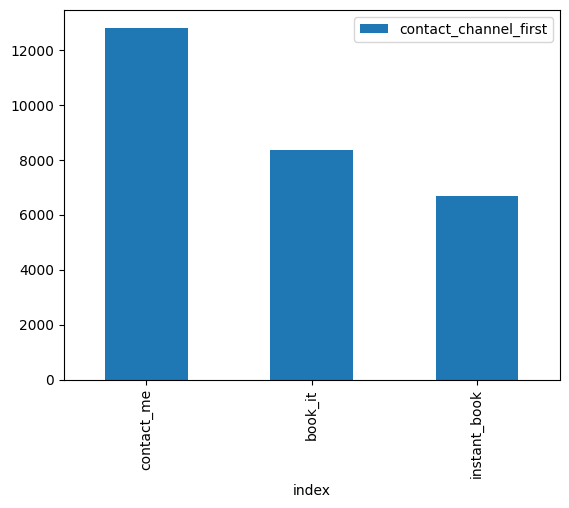

In [37]:
contacts["contact_channel_first"].value_counts().reset_index()\
    .plot(kind="bar", x="index")


In [32]:
contact_me_chn = contacts.query("contact_channel_first == 'contact_me'")

,id_user_anon,country,words_in_user_profile
0,1d16a001-31a2-494c-a101-1f7b308adc62,FR,0
1,42607e0a-86c0-472e-b633-9e192114e93c,AR,0
2,25f85eb5-a700-44e1-b142-4c076222198d,BR,0
3,55abeba0-18ef-4c58-80f4-3c278b706aca,BR,1
4,5d62d35a-7d6d-45dd-ae9b-a5d2f82a7d7b,BR,98


In [5]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27887 entries, 0 to 27886
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   id_guest_anon                         27887 non-null  object        
 1   id_host_anon                          27887 non-null  object        
 2   id_listing_anon                       27887 non-null  object        
 3   ts_interaction_first                  27887 non-null  datetime64[ns]
 4   ts_reply_at_first                     25855 non-null  datetime64[ns]
 5   ts_accepted_at_first                  16415 non-null  datetime64[ns]
 6   ts_booking_at                         11587 non-null  datetime64[ns]
 7   ds_checkin_first                      27887 non-null  datetime64[ns]
 8   ds_checkout_first                     27887 non-null  datetime64[ns]
 9   m_guests                              27886 non-null  float64       
 10

### Joining the contacts and listings table together based on the contacts dataset

In [42]:
df_listings_contacts = pd.merge(left=contacts, right=listings, on="id_listing_anon", how="left")


In [43]:
df_listings_contacts

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker,Entire home/apt,Copacabana,9.0
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36,NaT,NaT,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47,NaT,NaT,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new,Private room,Vidigal,49.0
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52,2016-05-05 15:17:40,2016-05-05 15:17:40,NaT,2016-05-27,2016-05-29,2.0,3,203.0,contact_me,new,Entire home/apt,Copacabana,17.0
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25,2016-06-23 03:09:26,2016-06-23 03:09:33,2016-06-23 03:09:33,2016-08-19,2016-08-21,3.0,25,0.0,instant_book,past_booker,Entire home/apt,Ipanema,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27882,b4fea538-8266-4b19-b211-5d93c3e6d05b,b328e13e-b11c-4a63-a137-daa527958c49,78e86cac-d1d5-46ef-889f-d3f19b068afb,2016-01-21 00:14:24,2016-01-21 00:42:53,NaT,NaT,2016-01-22,2016-01-31,1.0,4,447.0,contact_me,past_booker,Entire home/apt,-unknown-,5.0
27883,0894f35e-442a-40f5-b908-b07016e6d6ff,d54423d3-776e-4978-b6c0-7cf59c76ec3c,2e00192a-786d-4202-bd07-80f2e69b00cd,2016-04-11 18:21:26,2016-04-11 18:21:26,2016-04-11 18:21:26,2016-04-11 18:21:26,2016-06-08,2016-06-11,2.0,21,0.0,instant_book,past_booker,Entire home/apt,Barra da Tijuca,26.0
27884,d75edd43-0810-4b35-8b1e-5ab8271d48a9,63124840-6516-459c-95ed-108f0d5cef41,9992dc76-c770-4db9-86a2-a4edbd1147f3,2016-02-24 12:19:31,2016-02-24 12:19:39,2016-03-02 01:51:02,NaT,2016-08-18,2016-08-22,2.0,5,74.0,contact_me,new,Private room,Copacabana,13.0
27885,a997e85d-52cc-4bcc-97b3-e4c70e29721b,efa7ea8b-e78c-48d1-abfd-1dfc06c48e61,bc7545c3-8491-44ab-be64-f73d92b944ac,2016-02-08 08:13:08,2016-02-08 08:13:08,2016-02-08 08:13:08,2016-02-08 08:13:08,2016-03-06,2016-03-08,1.0,20,163.0,instant_book,past_booker,Entire home/apt,Ipanema,41.0


### Renaming the user_id column to match the listings dataset 

In [8]:
users = users.rename(columns={'id_user_anon': 'id_guest_anon'})
users.head()

,id_guest_anon,country,words_in_user_profile
0,1d16a001-31a2-494c-a101-1f7b308adc62,FR,0
1,42607e0a-86c0-472e-b633-9e192114e93c,AR,0
2,25f85eb5-a700-44e1-b142-4c076222198d,BR,0
3,55abeba0-18ef-4c58-80f4-3c278b706aca,BR,1
4,5d62d35a-7d6d-45dd-ae9b-a5d2f82a7d7b,BR,98


### dropping the duplicated rows in users dataset 

In [9]:
users.duplicated().sum()

68

In [10]:
users = users.drop_duplicates()

In [11]:
users.duplicated().sum()

0

### Joining the User table to the previous joined table 

In [39]:
df_lst_cnct_usr = pd.merge(left=df_listings_contacts, right=users, on="id_guest_anon", how="left")



NameError: name 'df_listings_contacts' is not defined

In [13]:
df_lst_cnct_usr.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,country,words_in_user_profile
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker,Entire home/apt,Copacabana,9.0,CL,0
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36,NaT,NaT,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker,Entire home/apt,Copacabana,0.0,FR,0
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47,NaT,NaT,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new,Private room,Vidigal,49.0,AR,0
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52,2016-05-05 15:17:40,2016-05-05 15:17:40,NaT,2016-05-27,2016-05-29,2.0,3,203.0,contact_me,new,Entire home/apt,Copacabana,17.0,BR,0
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25,2016-06-23 03:09:26,2016-06-23 03:09:33,2016-06-23 03:09:33,2016-08-19,2016-08-21,3.0,25,0.0,instant_book,past_booker,Entire home/apt,Ipanema,1.0,BR,1


In [14]:
df_lst_cnct_usr.isnull().sum()

id_guest_anon                               0
id_host_anon                                0
id_listing_anon                             0
ts_interaction_first                        0
ts_reply_at_first                        2032
ts_accepted_at_first                    11472
ts_booking_at                           16300
ds_checkin_first                            0
ds_checkout_first                           0
m_guests                                    1
m_interactions                              0
m_first_message_length_in_characters        0
contact_channel_first                       0
guest_user_stage_first                      0
room_type                                   0
listing_neighborhood                        0
total_reviews                               0
country                                     1
words_in_user_profile                       0
dtype: int64

In [15]:
df_lst_cnct_usr.shape

(27887, 19)

In [16]:
contacts.shape

(27887, 14)

### adding a column for booking status - 1 for booked and 0 for not booked

In [17]:
df_lst_cnct_usr["ts_booking_at"].notnull()

0         True
1        False
2        False
3        False
4         True
         ...  
27882    False
27883     True
27884    False
27885     True
27886     True
Name: ts_booking_at, Length: 27887, dtype: bool

In [18]:
df_lst_cnct_usr["booked"] = np.where(df_lst_cnct_usr["ts_booking_at"].notnull(), 1, 0)

### adding a column for msg replied and inquiry accepted - 1 for yes and 0 for no

In [19]:
df_lst_cnct_usr["msg_replied"] = np.where(df_lst_cnct_usr["ts_reply_at_first"].notnull(), 1, 0)

In [20]:
df_lst_cnct_usr["accepted_inquiry"] = np.where(df_lst_cnct_usr["ts_accepted_at_first"].notnull(), 1, 0)

In [21]:
df_lst_cnct_usr.head(5)

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,...,contact_channel_first,guest_user_stage_first,room_type,listing_neighborhood,total_reviews,country,words_in_user_profile,booked,msg_replied,accepted_inquiry
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-04-21 03:15:00,2016-08-02,2016-08-06,4.0,...,book_it,past_booker,Entire home/apt,Copacabana,9.0,CL,0,1,1,1
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36,NaT,NaT,2016-08-11,2016-08-22,5.0,...,contact_me,past_booker,Entire home/apt,Copacabana,0.0,FR,0,0,1,0
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47,NaT,NaT,2016-03-14,2016-03-23,1.0,...,contact_me,new,Private room,Vidigal,49.0,AR,0,0,1,0
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52,2016-05-05 15:17:40,2016-05-05 15:17:40,NaT,2016-05-27,2016-05-29,2.0,...,contact_me,new,Entire home/apt,Copacabana,17.0,BR,0,0,1,1
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25,2016-06-23 03:09:26,2016-06-23 03:09:33,2016-06-23 03:09:33,2016-08-19,2016-08-21,3.0,...,instant_book,past_booker,Entire home/apt,Ipanema,1.0,BR,1,1,1,1


# Hypothesis

1. new_users who are booking via contact_me channel have less chance of being accepted 
2. auto_book has most booking acceptance for both new_user and past_booker
3. does the number of guests have any affect on booking 
4. does a good bio in user profile have any affect on booking 


<hr>

## Finding out how many booked and how many couldnt book

<hr>

1. there are total of 27,887 booking requests. 
2. 16,300 of guests coulnt book 
3. 11,587 of guests were able to book


In [22]:
df_lst_cnct_usr.shape

(27887, 22)

In [38]:

px.bar(df_lst_cnct_usr.groupby("booked").count().reset_index(), y="id_guest_anon", x="booked")



## 1. new_users who are booking via contact_me channel have less chance of being accepted

In [24]:
df_lst_cnct_usr.groupby(
    ["booked","guest_user_stage_first", "contact_channel_first"]
    
    )[["id_guest_anon"]].count()


id_guest_anon
booked guest_user_stage_first contact_channel_first               
0      -unknown-              book_it                           11
                              contact_me                        10
       new                    book_it                         2353
                              contact_me                      8267
       past_booker            book_it                         2019
                              contact_me                      3640
1      -unknown-              book_it                            3
                              contact_me                         1
                              instant_book                      10
       new                    book_it                         1946
                              contact_me                       537
                              instant_book                    2802
       past_booker            book_it                         2034
                              contact_me                       373
                              instant_book                    3881

<Axes: xlabel='contact_channel_first', ylabel='id_guest_anon'>

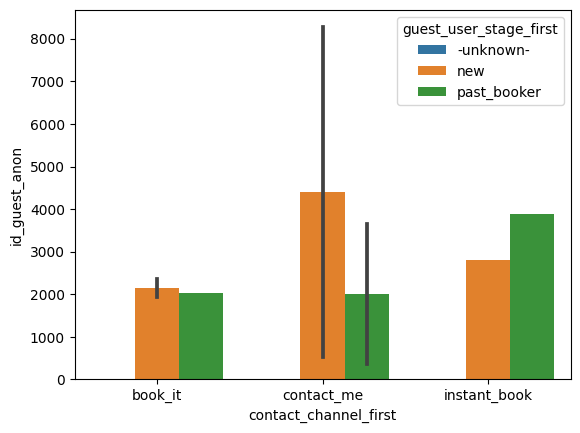

In [34]:
a_ = df_lst_cnct_usr.groupby(["booked","guest_user_stage_first", "contact_channel_first"]).count().reset_index()

sns.barplot(a_, y="id_guest_anon", x="contact_channel_first", hue="guest_user_stage_first")


<hr></hr>

## Why majority of new users are not able to book when they are using contact_me channel 

<hr></hr>

In [ ]:
df_lst_cnct_usr.


In [ ]:
# 5068 guests out of ~8000 inquiry didnt get accepted 

msg_not_accepted = new_users_cntc_me.loc[new_users_cntc_me["accepted_inquiry"] == 0]

msg_not_accepted.shape

<hr></hr>

### what could be the cause of user's inquiry didn't get accepted 

1. *is it related to number of words in their profile?*
2. *is it related to what kind of inquiry the guest had (no data available for that)*


<hr></hr>

In [ ]:
msg_not_accepted[msg_not_accepted["words_in_user_profile"] == 0].shape